In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tips = pd.read_csv('../data/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
party_counts = pd.crosstab(tips['day'], tips['size']) # row: day, column: size
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [4]:
# div: 'divide', 自動除到百分比?
# pct: percentage
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<AxesSubplot:xlabel='day'>

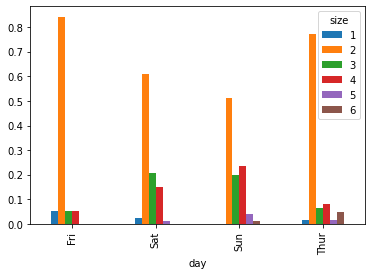

In [5]:
party_pcts.plot.bar()

In [6]:
# tipping percentage by day with seaborn
# Seaborn 套件是以 matplotlib 為基礎的高階繪圖套件，讓使用者能更加輕鬆地建立圖表，可以將它視為 matplotlib 的補強
import seaborn as sns

In [7]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [8]:
# create a new column 'tip_pct'
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

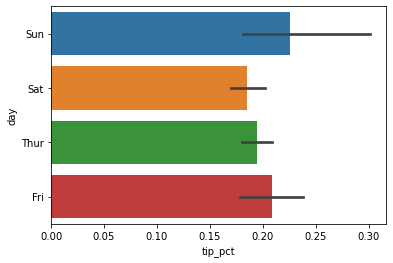

In [9]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
# the black lines on the bars are error bars. They can display either confidence intervals or the standard deviation. 
# error means the uncertainty of the measurement
# The bar plot shows an aggregation of some values, 
# and the error bar shows how spread out the original non-aggregated data was

# error bar 很長 -> 資料很分散 -> 組間差異要很明顯才能說整體有差異
# error bars overlap: no difference
# error bars don't cross: has difference

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

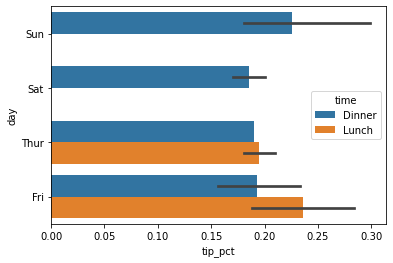

In [10]:
# hue enables the split by an additional categorical value
# hue: 色調，他會把同 column 中不同的值漆成不同顏色

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

# Thur dinner doesn't have a error bar because there is only one record of it.
# Sun and Sat don't have Lunch data

# Histograms and Density plots

In [16]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


## histogram
- histogram is a kind of bar plot that gives discretized display of value frequency

<AxesSubplot:ylabel='Frequency'>

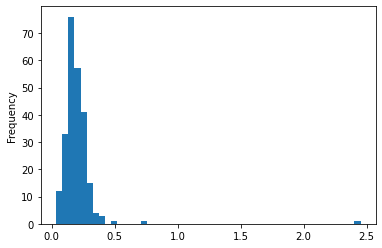

In [20]:
# the bars in the histogram are called 'bins'
# 數字越大一張圖擠的 bar 越多，代表 bar 越細
tips['tip_pct'].plot.hist(bins=50)

In [22]:
print(tips['tip_pct'].min())
print(tips['tip_pct'].max())

0.03695514845230575
2.452380952380953


## density plot
- It is a smoothed version of the histogram and is used in the same concept.
- density plot is formed by computing an estimate of a continuous probability distribution.
- density plot is also known as kernel density mixture.

<AxesSubplot:ylabel='Density'>

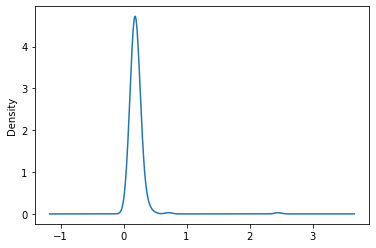

In [14]:
tips['tip_pct'].plot.density()

## histogram + density plot

In [25]:
comp1 = np.random.normal(0, 1, size=200) # mean=0, std=1
comp2 = np.random.normal(10, 2, size=200)
comp3 = np.random.normal(10, 2, size=10)
comp3

array([ 9.23256411, 11.12874001,  7.70887287, 10.04671486,  4.80867861,
        6.41237338, 11.36130188, 11.51965313, 10.45820157,  7.69128106])

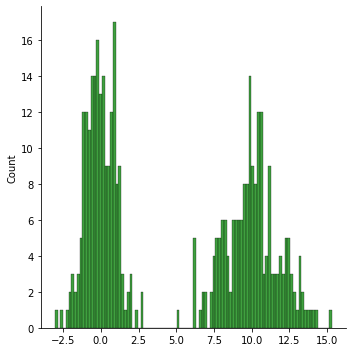

In [27]:
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='g')

# displot: distribution plot

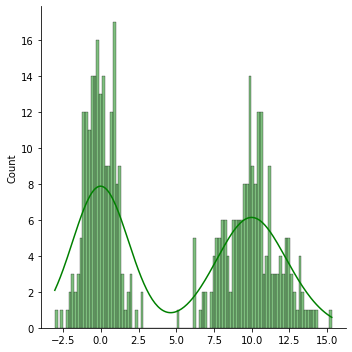

In [28]:
# kde: kernel density estimation
sns.displot(values, bins=100, color='g', kde=True)

<AxesSubplot:ylabel='Count'>

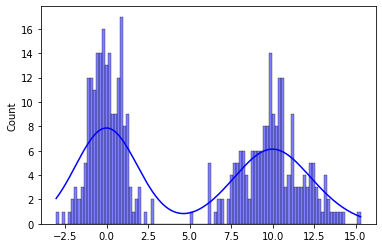

In [29]:
# another way of creating histogram and density plot

sns.histplot(values, bins=100, color='b', kde=True) # same plot as above

# Scatter / Point plot

In [30]:
macro = pd.read_csv('../data/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


- cpi: consumer price index
- m1: nominal money stock
- tbilrate: 3-month treasure bill
- unemp: unemployeement rate

In [31]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [32]:
# calculating the percentage
# the base of log is e
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


## scatter plot
- scatter plot is a useful tool to examine the relationship between two 1-dim series

<IPython.core.display.Javascript object>


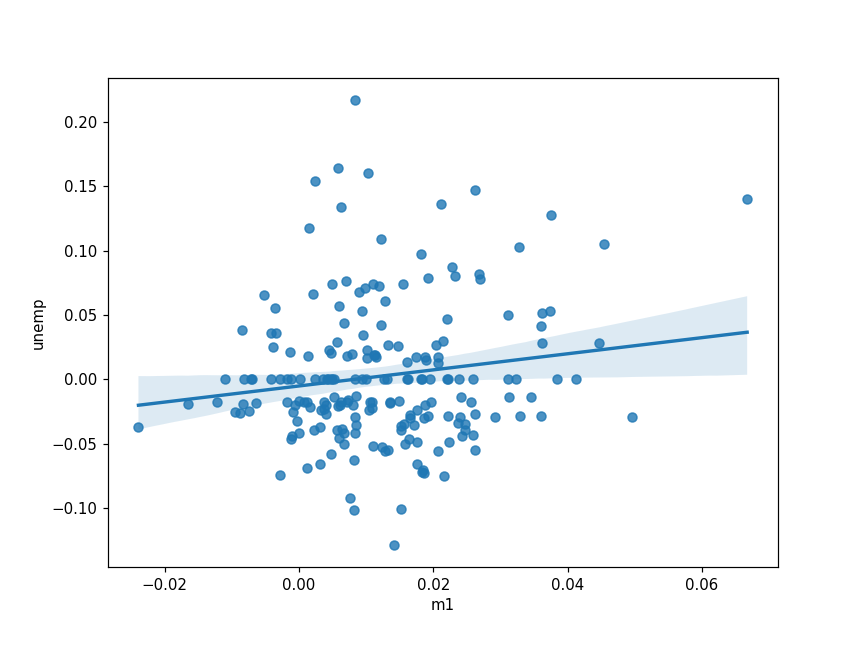

<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [52]:
# Plot data and a linear regression model fit
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='m1', y='unemp', data=trans_data, ax=ax)

# ax: Axes object to draw the plot onto, otherwise uses the current Axes.

<IPython.core.display.Javascript object>


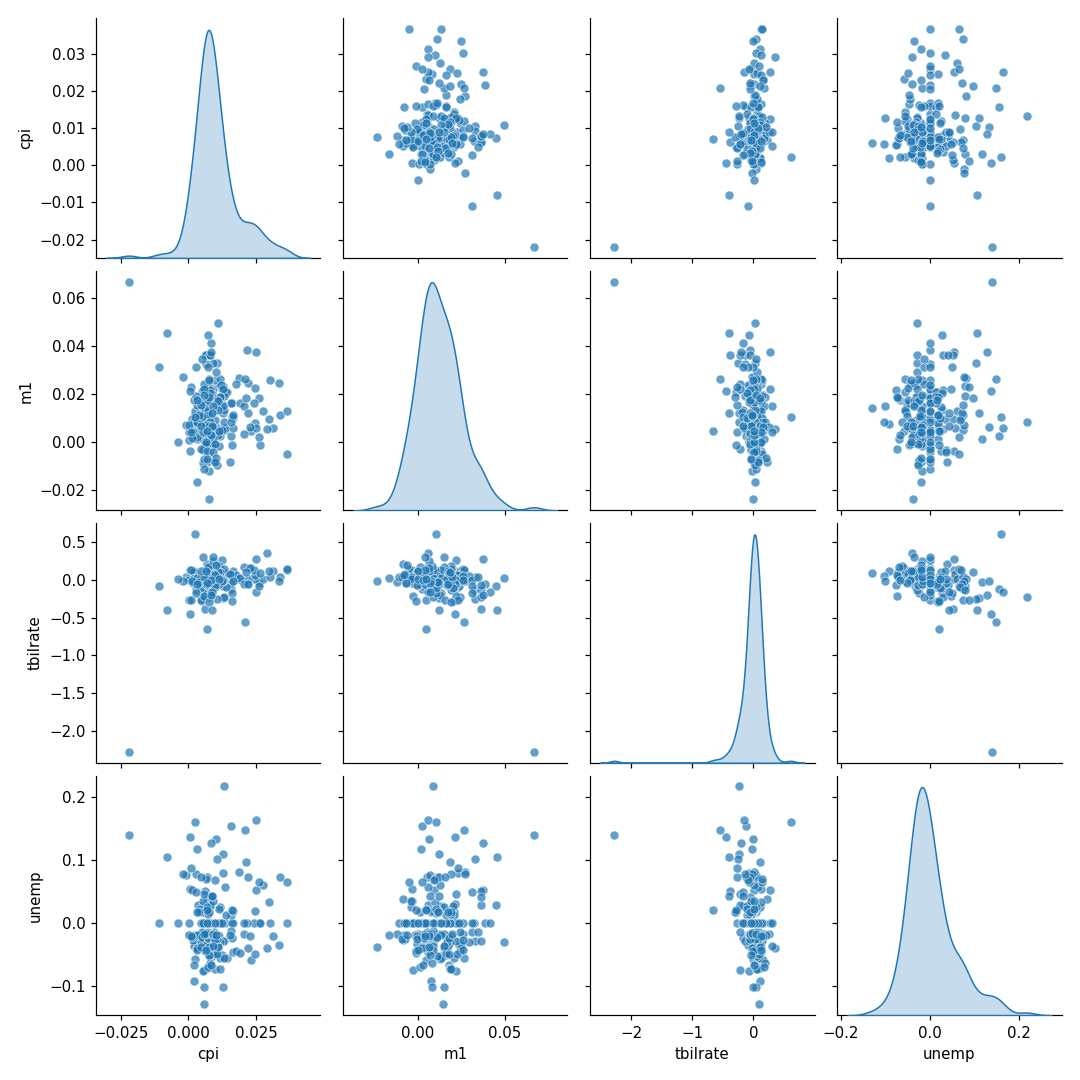

In [53]:
# pairplot / scatter plot matrix, notice that the column names and row names are on the x-axis and y-axis
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.7})

# diag_kind: kind of plot for the diagonal(對角線的) subplots.      
# kde: kernel density estimate
# {plot, diag, grid}_kwsdicts: dictionaries of keyword arguments. 
# {plot, diag, grid} are respectively for bivariate 雙變量, univariate 單變量 and PairGrid constructor.

<IPython.core.display.Javascript object>


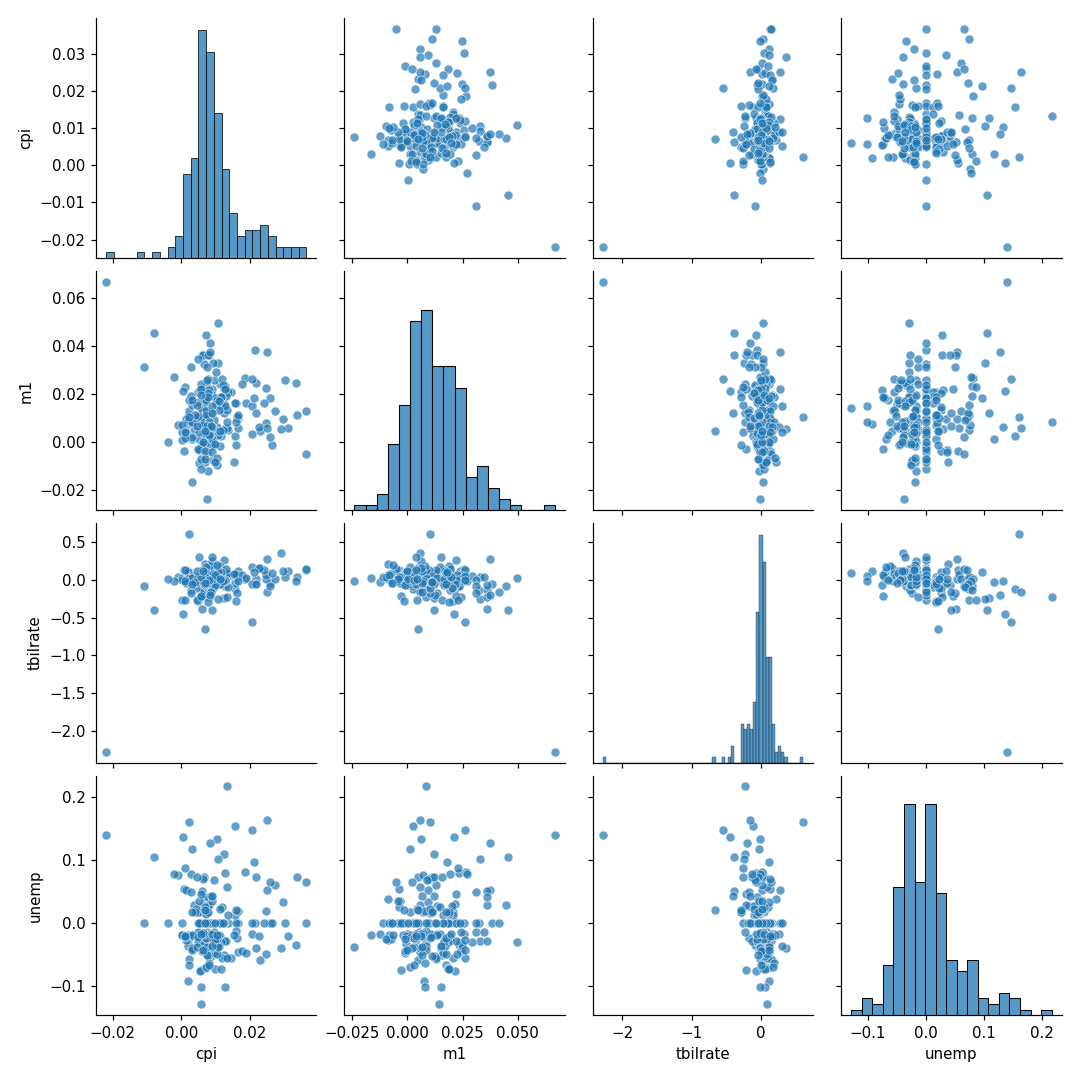

In [54]:
# change the density plot to histogram
sns.pairplot(trans_data, diag_kind='hist', plot_kws={'alpha': 0.7})

# Facet grid and categorical data

- what if we have additional grouping dimensions? We use facet grid to visualize many categorical variables. 

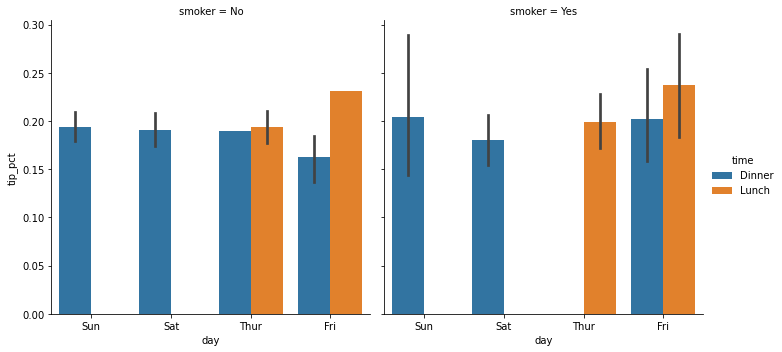

In [19]:
#                                 time的兩個值有兩個顏色
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', # smoker的兩個值被拆成兩張圖
            kind='bar', data=tips[tips['tip_pct'] < 1])

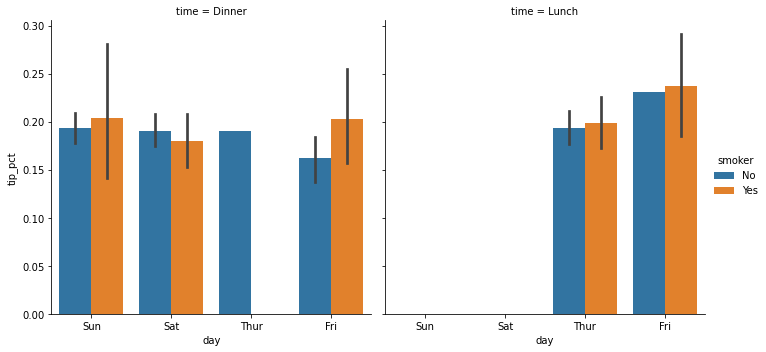

In [20]:
#                                 smoker的兩個值有兩個顏色
sns.catplot(x='day', y='tip_pct', hue='smoker', col='time', # time的兩個值被拆成兩張圖
            kind='bar', data=tips[tips['tip_pct'] < 1])

<IPython.core.display.Javascript object>


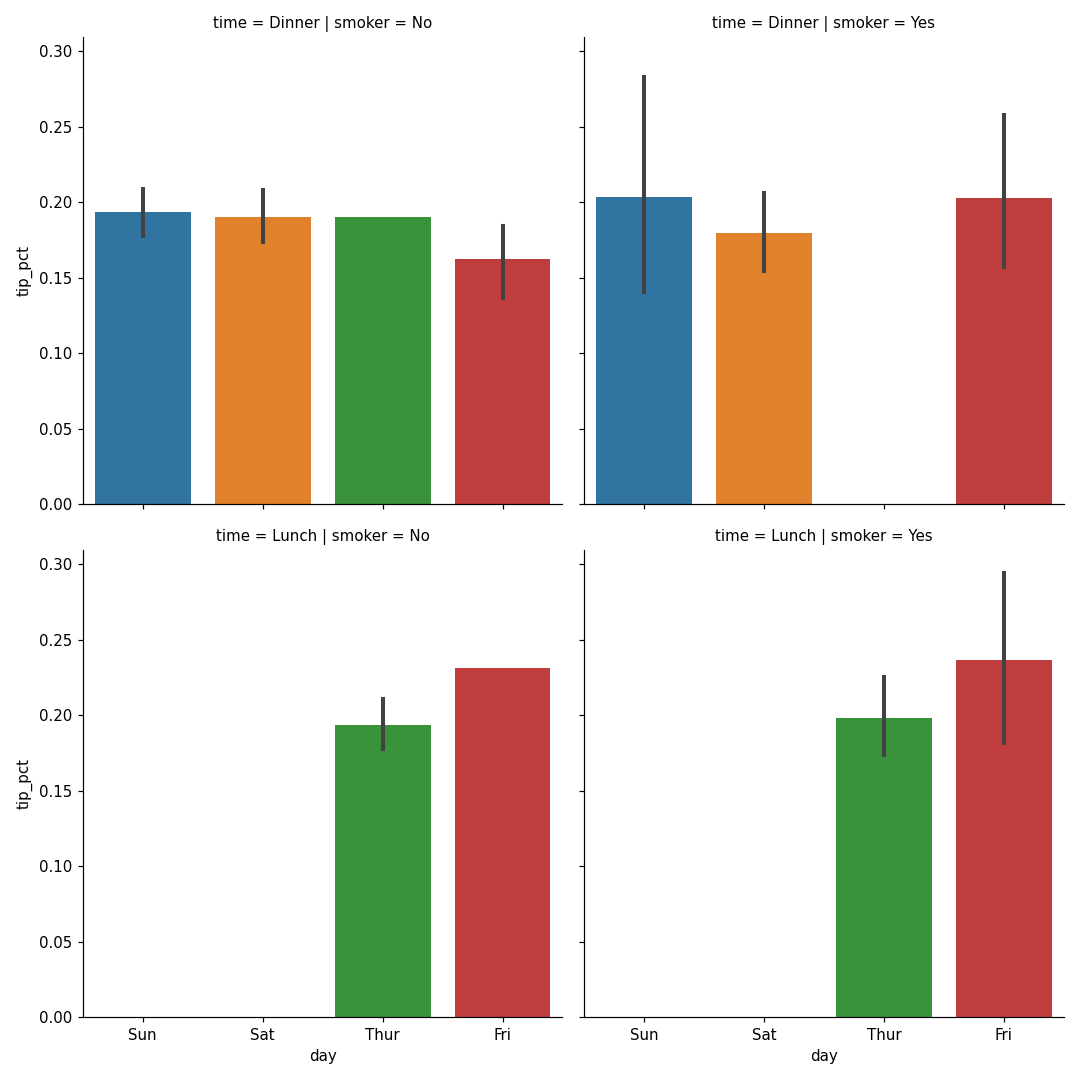

In [56]:
#                                 同row的time值一樣，同column的smoker值一樣
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips['tip_pct'] < 1])

# Box plot
- What if we want to visualize median, quartiles, and outliers? Box plot can be effective way to do that.

<IPython.core.display.Javascript object>


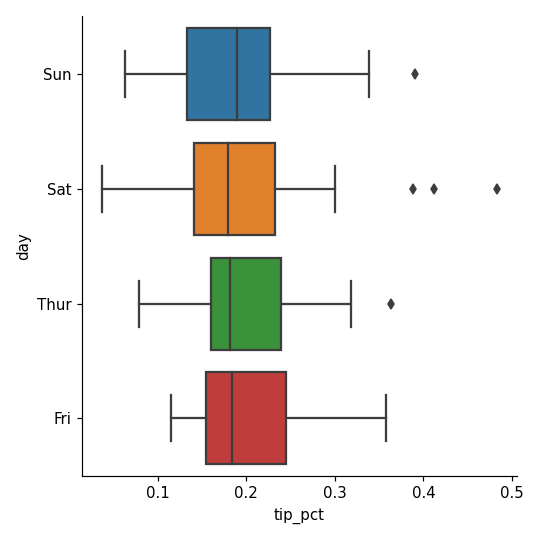

In [58]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips['tip_pct'] < 0.5])

# Machine learning
- take flower to be example
- feature data: length, height, width
- label: (categories) rose, lily and so on

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
%matplotlib inline

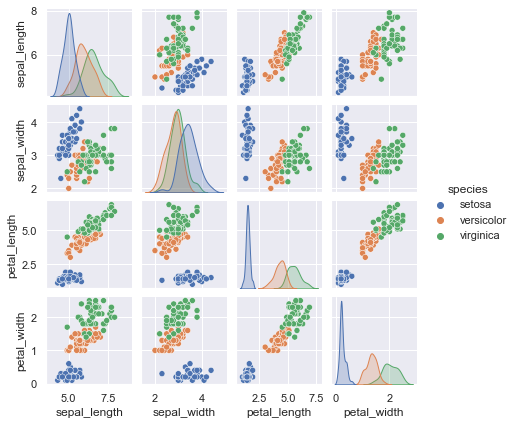

In [8]:
# visualize the iris data. Pairplot was introduced above
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [9]:
# feature matrix
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
type(X_iris)

(150, 4)


pandas.core.frame.DataFrame

In [10]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# target array
y_iris = iris['species']
print(y_iris.shape)
type(y_iris)

(150,)


pandas.core.series.Series

# Supervised learning example: Simple linear regression
- consider a simple linear regression by fitting a line to (x, y) data

(50,)
1
(50,)
1


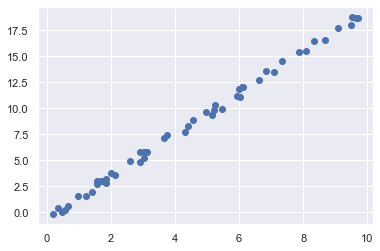

In [12]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50) # slope * x - y-intercept
# 2 is slop(coefficient), -1 is intercept

plt.scatter(x, y)
print(x.shape)
print(x.ndim)
print(y.shape)
print(y.ndim)

In [13]:
X = x[:, np.newaxis]
print(X.shape)
print(X.ndim)

(50, 1)
2


In [14]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [15]:
# choose a class model; we can import a linear regression class
from sklearn.linear_model import LinearRegression

In [16]:
# instantiation of linear regression class and specifying the hyperparameter
# fit_intercept=True means we have intercept to be used in the calculation
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [17]:
# fit the model to our data
# and apply our model to data using fit() method
model.fit(X, y)

LinearRegression()

In [18]:
# the results are stored in model-specific attributes
# all model parameters that were learned during fit() process have trailing underscore

model.coef_ # this number should be close to 2 (coefficient = slope)

array([2.00660766])

In [19]:
model.intercept_

-0.5350275750800026

## Predict ladels for unknown data
- new data will be a grid of x values
- we will ask what y values predicted by model

In [31]:
xfit = np.linspace(-1, 11) # split -1 to 11 to 50 species (by default)

In [82]:
# transforming x values into [n_samples, n_features]
Xfit = xfit[:, np.newaxis]

In [83]:
yfit = model.predict(Xfit)

## Visualize the raw data and the model fit

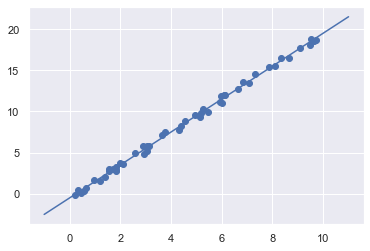

In [84]:
plt.scatter(X, y)    # raw data
plt.plot(xfit, yfit) # model fit